https://pandas.pydata.org/docs/user_guide/

In [ ]:
!pip install seaborn

In [102]:
import pandas as pd
import numpy as np


## Object creation

In [2]:
pd.DataFrame({'A': [1,2,3]})

,A
0,1
1,2
2,3


In [3]:
# Pandas series
s = pd.Series([1,3,5,np.nan,6])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
dtype: float64

In [4]:
# Creating a DataFrame by passing a NumPy array, with a datetime index using date_range() and labeled columns:

dates = pd.date_range('20230101', periods=6)
dates

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.rand(6,4), index= dates, columns=list('ABCD')) # columns solo soporta list + abc etc.
df

,A,B,C,D
2023-01-01,0.105255,0.928361,0.341497,0.689323
2023-01-02,0.990776,0.996628,0.726216,0.894159
2023-01-03,0.140276,0.309652,0.402898,0.841840
2023-01-04,0.880824,0.259711,0.649133,0.565083
2023-01-05,0.722495,0.444338,0.997136,0.814508
2023-01-06,0.972443,0.746277,0.654804,0.439788


In [6]:
df2 = pd.DataFrame(
    {
        'A': 1.0,
        'B': pd.Timestamp('20230101'),
        'C': pd.Series(1,index=list(range(5)),dtype= 'float32'),
        'D': np.array([3] * 5, dtype='int32'),
        'E': pd.Categorical(['test','train','test','train', 'train']),
        'F': 'foo',

    }
)

df2

,A,B,C,D,E,F
0,1.0,2023-01-01,1.0,3,test,foo
1,1.0,2023-01-01,1.0,3,train,foo
2,1.0,2023-01-01,1.0,3,test,foo
3,1.0,2023-01-01,1.0,3,train,foo
4,1.0,2023-01-01,1.0,3,train,foo


## Viewing data

In [23]:
df.head(3)

,A,B,C,D
2023-01-01,0.989147,0.417359,0.219573,0.312756
2023-01-02,0.195841,0.375703,0.113539,0.571770
2023-01-03,0.442272,0.222281,0.461801,0.294433


In [29]:
df.tail(3)

,A,B,C,D
2023-01-04,0.876921,0.400767,0.751817,0.319399
2023-01-05,0.133776,0.341334,0.892027,0.850734
2023-01-06,0.974680,0.217608,0.174138,0.864433


In [30]:
df2.sample() # show random records in the dataframe

,A,B,C,D,E,F
1,1.0,2023-01-01,1.0,3,train,foo


In [26]:
df3 = df2.to_numpy()
df3

array([[1.0, Timestamp('2023-01-01 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2023-01-01 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2023-01-01 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2023-01-01 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2023-01-01 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [28]:
# Statistics summary
df2.describe()

,A,C,D
count,5.0,5.0,5.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [36]:
# sort by an axis

df.sort_index(axis=1, ascending=False) # axis is obviously rows/cols

,D,C,B,A
2023-01-01,0.312756,0.219573,0.417359,0.989147
2023-01-02,0.571770,0.113539,0.375703,0.195841
2023-01-03,0.294433,0.461801,0.222281,0.442272
2023-01-04,0.319399,0.751817,0.400767,0.876921
2023-01-05,0.850734,0.892027,0.341334,0.133776
2023-01-06,0.864433,0.174138,0.217608,0.974680


In [37]:
# sort by values

df.sort_values(by='B')

,A,B,C,D
2023-01-06,0.974680,0.217608,0.174138,0.864433
2023-01-03,0.442272,0.222281,0.461801,0.294433
2023-01-05,0.133776,0.341334,0.892027,0.850734
2023-01-02,0.195841,0.375703,0.113539,0.571770
2023-01-04,0.876921,0.400767,0.751817,0.319399
2023-01-01,0.989147,0.417359,0.219573,0.312756


## Selection

In [46]:
df['A']

2023-01-01    0.989147
2023-01-02    0.195841
2023-01-03    0.442272
2023-01-04    0.876921
2023-01-05    0.133776
2023-01-06    0.974680
Freq: D, Name: A, dtype: float64

In [47]:
# Selecting via [] (__getitem__), which slices the rows:
# by position

df[0:3]

,A,B,C,D
2023-01-01,0.989147,0.417359,0.219573,0.312756
2023-01-02,0.195841,0.375703,0.113539,0.571770
2023-01-03,0.442272,0.222281,0.461801,0.294433


In [50]:
# by data content, interval

df['20230101':'20230104']

,A,B,C,D
2023-01-01,0.989147,0.417359,0.219573,0.312756
2023-01-02,0.195841,0.375703,0.113539,0.571770
2023-01-03,0.442272,0.222281,0.461801,0.294433
2023-01-04,0.876921,0.400767,0.751817,0.319399


## Selection by label

In [53]:
df.loc[dates[0]] # data is a variable created before df. Because It's the index column inside df in can be here.

A    0.989147
B    0.417359
C    0.219573
D    0.312756
Name: 2023-01-01 00:00:00, dtype: float64

In [65]:
# Selecting on a multi-axis by label:

df.loc[:,['A','B']] # first place is for rows. It doesn't accept [0:3] but does ['20230101':'20230105'] or '20230105'

,A,B
2023-01-01,0.989147,0.417359
2023-01-02,0.195841,0.375703
2023-01-03,0.442272,0.222281
2023-01-04,0.876921,0.400767
2023-01-05,0.133776,0.341334
2023-01-06,0.974680,0.217608


In [66]:
# for getting scalar values

df.loc[dates[0],['A','B']] # It returns values in cols A B for index 0

A    0.989147
B    0.417359
Name: 2023-01-01 00:00:00, dtype: float64

##  Slection by position

In [8]:
df.iloc[3]

A    0.223099
B    0.155045
C    0.377725
D    0.223300
Name: 2023-01-04 00:00:00, dtype: float64

In [9]:
df.iloc[3:5,0:2]

,A,B
2023-01-04,0.223099,0.155045
2023-01-05,0.155177,0.724859


In [10]:
# By lists of integer position locations, similar to the NumPy/Python style:
df.iloc[[1,2],[3]]

,D
2023-01-02,0.308233
2023-01-03,0.304571


In [12]:
# For slicing rows explicitly:

df.iloc[:3,:]

,A,B,C,D
2023-01-01,0.867203,0.866931,0.606194,0.465880
2023-01-02,0.355441,0.290315,0.759060,0.308233
2023-01-03,0.430939,0.709973,0.529672,0.304571


In [13]:
# For getting fast access to a scalar (equivalent to the prior method):
df.iat[1, 1]

0.29031465801110357

## Boolean indexing

In [16]:
df[df['A'] > 0.5] # this process doesn´t write new info, it only shows data

,A,B,C,D
2023-01-01,0.867203,0.866931,0.606194,0.46588


In [18]:
df[df > 0.5]

,A,B,C,D
2023-01-01,0.867203,0.866931,0.606194,NaN
2023-01-02,NaN,NaN,0.759060,NaN
2023-01-03,NaN,0.709973,0.529672,NaN
2023-01-04,NaN,NaN,NaN,NaN
2023-01-05,NaN,0.724859,NaN,0.929878
2023-01-06,NaN,NaN,0.678343,NaN


In [19]:
df2 = df.copy()

df2["E"] = ["one", "one", "two", "three", "four", "three"]


In [20]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2023-01-03,0.430939,0.709973,0.529672,0.304571,two
2023-01-05,0.155177,0.724859,0.134730,0.929878,four


## Setting

In [24]:
# Setting a new column automatically aligns the data by the indexes:
pd.Series([1, 3, 2, 4, 5, 6], index=pd.date_range("20130102", periods=6))

2013-01-02    1
2013-01-03    3
2013-01-04    2
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [36]:
# Setting values by label
df.at[dates[0],"C"] = 0

In [37]:
df

,A,B,C,D
2023-01-01,0.000000,0.000000,0.000000,0.465880
2023-01-02,0.355441,0.290315,0.759060,0.308233
2023-01-03,0.430939,0.709973,0.529672,0.304571
2023-01-04,0.223099,0.155045,0.377725,0.223300
2023-01-05,0.155177,0.724859,0.134730,0.929878
2023-01-06,0.416779,0.360461,0.678343,0.024722


In [48]:
# Setting values by position:
df.iat[0,1] = 111
df

,A,B,C,D
2023-01-01,0.000000,111.000000,0.000000,0.000000
2023-01-02,0.355441,0.000000,0.759060,111.000000
2023-01-03,0.430939,0.709973,0.529672,0.304571
2023-01-04,0.223099,0.155045,0.377725,0.223300
2023-01-05,0.155177,0.724859,0.134730,0.929878
2023-01-06,0.416779,0.360461,0.000000,0.024722


In [52]:
# Setting by assigning with a NumPy array:

df.loc[:,'E'] = np.array([6] * len(df))
df

,A,B,C,D,E
2023-01-01,0.000000,111.000000,0.000000,5,6
2023-01-02,0.355441,0.000000,0.759060,5,6
2023-01-03,0.430939,0.709973,0.529672,5,6
2023-01-04,0.223099,0.155045,0.377725,5,6
2023-01-05,0.155177,0.724859,0.134730,5,6
2023-01-06,0.416779,0.360461,0.000000,5,6


## Missing data
pandas primarily uses the value **np.nan** to represent missing data. It is by default not included in computations. See the [Missing Data section](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data).
<br/>

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [55]:
df1 = df.reindex(index=dates[0:5], columns=list(df.columns) + ["E"])

In [56]:
df1

,A,B,C,D,E,E
2023-01-01,0.000000,111.000000,0.000000,5,6,6
2023-01-02,0.355441,0.000000,0.759060,5,6,6
2023-01-03,0.430939,0.709973,0.529672,5,6,6
2023-01-04,0.223099,0.155045,0.377725,5,6,6
2023-01-05,0.155177,0.724859,0.134730,5,6,6


In [58]:
df1.dropna(how= 'any')

,A,B,C,D,E,E
2023-01-01,0.000000,111.000000,0.000000,5,6,6
2023-01-02,0.355441,0.000000,0.759060,5,6,6
2023-01-03,0.430939,0.709973,0.529672,5,6,6
2023-01-04,0.223099,0.155045,0.377725,5,6,6
2023-01-05,0.155177,0.724859,0.134730,5,6,6


In [59]:
df1.fillna(value=5)

,A,B,C,D,E,E
2023-01-01,0.000000,111.000000,0.000000,5,6,6
2023-01-02,0.355441,0.000000,0.759060,5,6,6
2023-01-03,0.430939,0.709973,0.529672,5,6,6
2023-01-04,0.223099,0.155045,0.377725,5,6,6
2023-01-05,0.155177,0.724859,0.134730,5,6,6


isna() gets the boolean mask where values are nan:

In [60]:
pd.isna(df1)

,A,B,C,D,E,E
2023-01-01,False,False,False,False,False,False
2023-01-02,False,False,False,False,False,False
2023-01-03,False,False,False,False,False,False
2023-01-04,False,False,False,False,False,False
2023-01-05,False,False,False,False,False,False


In [78]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(1)
s


2023-01-01    NaN
2023-01-02    1.0
2023-01-03    3.0
2023-01-04    5.0
2023-01-05    NaN
2023-01-06    6.0
Freq: D, dtype: float64

In [79]:
df.sub(s, axis="index")

,A,B,C,D,E
2023-01-01,NaN,NaN,NaN,NaN,NaN
2023-01-02,-0.644559,-1.000000,-0.240940,4.0,5.0
2023-01-03,-2.569061,-2.290027,-2.470328,2.0,3.0
2023-01-04,-4.776901,-4.844955,-4.622275,0.0,1.0
2023-01-05,NaN,NaN,NaN,NaN,NaN
2023-01-06,-5.583221,-5.639539,-6.000000,-1.0,0.0


## Apply

DataFrame.apply() applies a user defined function to the data:

In [80]:
df.apply(np.cumsum) # cummulative sum. It starts from 0 index.

,A,B,C,D,E
2023-01-01,0.000000,111.000000,0.000000,5,6
2023-01-02,0.355441,111.000000,0.759060,10,12
2023-01-03,0.786379,111.709973,1.288731,15,18
2023-01-04,1.009479,111.865018,1.666456,20,24
2023-01-05,1.164656,112.589877,1.801186,25,30
2023-01-06,1.581434,112.950338,1.801186,30,36


In [86]:
df.apply(lambda x: x)

,A,B,C,D,E
2023-01-01,0.000000,111.000000,0.000000,5,6
2023-01-02,0.355441,0.000000,0.759060,5,6
2023-01-03,0.430939,0.709973,0.529672,5,6
2023-01-04,0.223099,0.155045,0.377725,5,6
2023-01-05,0.155177,0.724859,0.134730,5,6
2023-01-06,0.416779,0.360461,0.000000,5,6


In [87]:
df

,A,B,C,D,E
2023-01-01,0.000000,111.000000,0.000000,5,6
2023-01-02,0.355441,0.000000,0.759060,5,6
2023-01-03,0.430939,0.709973,0.529672,5,6
2023-01-04,0.223099,0.155045,0.377725,5,6
2023-01-05,0.155177,0.724859,0.134730,5,6
2023-01-06,0.416779,0.360461,0.000000,5,6


## Merge

### Concat

https://pandas.pydata.org/docs/user_guide/merging.html#merging

In [92]:
df3 = pd.DataFrame(np.random.randn(10, 4),columns=list('ABCD'))
df3

,A,B,C,D
0,0.285513,0.751334,0.694952,1.162972
1,-1.510815,-0.423467,0.681126,-0.903505
2,0.992493,-0.550343,-2.051083,0.677941
3,0.408733,0.429207,1.710363,-1.101475
4,-0.827839,-0.372200,-1.953402,-1.294181
5,-0.174614,-0.931388,-0.532147,-0.085117
6,0.539637,-0.123596,-0.972425,1.407105
7,0.832127,-0.535658,-0.085037,-0.147747
8,0.574846,0.166577,-0.687242,-0.669796
9,-0.333016,0.035940,-1.080260,0.161530


In [93]:
# break into pieces
pieces = [df3[:3],df3[3:7]]
pieces

[          A         B         C         D
 0  0.285513  0.751334  0.694952  1.162972
 1 -1.510815 -0.423467  0.681126 -0.903505
 2  0.992493 -0.550343 -2.051083  0.677941,
           A         B         C         D
 3  0.408733  0.429207  1.710363 -1.101475
 4 -0.827839 -0.372200 -1.953402 -1.294181
 5 -0.174614 -0.931388 -0.532147 -0.085117
 6  0.539637 -0.123596 -0.972425  1.407105]

In [94]:
pd.concat(pieces)

,A,B,C,D
0,0.285513,0.751334,0.694952,1.162972
1,-1.510815,-0.423467,0.681126,-0.903505
2,0.992493,-0.550343,-2.051083,0.677941
3,0.408733,0.429207,1.710363,-1.101475
4,-0.827839,-0.372200,-1.953402,-1.294181
5,-0.174614,-0.931388,-0.532147,-0.085117
6,0.539637,-0.123596,-0.972425,1.407105


### Join

In [96]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [97]:
pd.merge(left,right, on= 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure



In [99]:
df4 = pd.DataFrame(

    {

        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],

        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],

        "C": np.random.randn(8),

        "D": np.random.randn(8),

    }

)

df4

,A,B,C,D
0,foo,one,1.639079,-0.730132
1,bar,one,1.690887,-0.845310
2,foo,two,-0.326373,0.412779
3,bar,three,0.067343,0.441145
4,foo,two,0.654771,-0.517727
5,bar,two,0.429775,-1.182073
6,foo,one,-1.242009,-0.215916
7,foo,three,-0.566472,1.344325


In [109]:
df4.groupby(['A','B'])[['C','D']].mean()

C         D
A   B                        
bar one    1.690887 -0.845310
    three  0.067343  0.441145
    two    0.429775 -1.182073
foo one    0.198535 -0.473024
    three -0.566472  1.344325
    two    0.164199 -0.052474

## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [8]:
tuples = list(

    zip(

        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],

        ["one", "two", "one", "two", "one", "two", "one", "two"],

    )

)

tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

We can create a multi-index reference.

In [9]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df5 = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df5

A         B
first second                    
bar   one     1.129116  2.170134
      two     0.100674 -2.567276
baz   one     0.894955 -1.162755
      two    -0.749142 -1.252860
foo   one     0.503789 -1.014525
      two     0.949618  0.214806
qux   one     0.310489  0.487809
      two    -0.865465 -0.965174

The **stack()** method “compresses” a level in the DataFrame’s columns:

In [122]:
stacked = df5.stack()
stacked

first  second   
bar    one     A    0.712964
               B    0.513940
       two     A    1.398110
               B    0.267084
baz    one     A   -0.787249
               B    2.083505
       two     A    0.714026
               B   -0.963531
foo    one     A    1.069326
               B   -1.488323
       two     A   -0.255577
               B    0.025732
qux    one     A   -1.035702
               B    1.089067
       two     A   -0.195520
               B   -0.445893
dtype: float64

first  second   
bar    one     A    0.712964
               B    0.513940
       two     A    1.398110
               B    0.267084
baz    one     A   -0.787249
               B    2.083505
       two     A    0.714026
               B   -0.963531
foo    one     A    1.069326
               B   -1.488323
       two     A   -0.255577
               B    0.025732
qux    one     A   -1.035702
               B    1.089067
       two     A   -0.195520
               B   -0.445893
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [123]:
stacked.unstack()


A         B
first second                    
bar   one     0.712964  0.513940
      two     1.398110  0.267084
baz   one    -0.787249  2.083505
      two     0.714026 -0.963531
foo   one     1.069326 -1.488323
      two    -0.255577  0.025732
qux   one    -1.035702  1.089067
      two    -0.195520 -0.445893

In [125]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.712964  1.398110
      B  0.513940  0.267084
baz   A -0.787249  0.714026
      B  2.083505 -0.963531
foo   A  1.069326 -0.255577
      B -1.488323  0.025732
qux   A -1.035702 -0.195520
      B  1.089067 -0.445893

In [126]:

stacked.unstack(0)

first          bar       baz       foo       qux
second                                          
one    A  0.712964 -0.787249  1.069326 -1.035702
       B  0.513940  2.083505 -1.488323  1.089067
two    A  1.398110  0.714026 -0.255577 -0.195520
       B  0.267084 -0.963531  0.025732 -0.445893

## Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot).

In [10]:
df7 = pd.DataFrame(

    {

        "A": ["one", "one", "two", "three"] * 3,

        "B": ["A", "B", "C"] * 4,

        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,

        "D": np.random.randn(12),

        "E": np.random.randn(12),

    }

)
df7

,A,B,C,D,E
0,one,A,foo,0.261950,-0.351162
1,one,B,foo,-1.533842,-0.412465
2,two,C,foo,-1.952554,-1.070854
3,three,A,bar,-0.112672,-0.680637
4,one,B,bar,-1.104711,0.247601
5,one,C,bar,0.978492,-1.022182
6,two,A,foo,0.051283,-0.105155
7,three,B,foo,1.225472,0.087161
8,one,C,foo,0.445879,-0.126263
9,one,A,bar,-0.220212,1.234095


pivot_table() pivots a DataFrame specifying the values, index and columns

In [129]:
pd.pivot_table(df7, values='D', index= ['A','B'],columns=['C'])

C             bar       foo
A     B                    
one   A -0.037540 -0.166331
      B  0.053389  0.191617
      C  0.166928 -0.135977
three A -0.551408       NaN
      B       NaN  0.433491
      C -1.759162       NaN
two   A       NaN  2.197873
      B -1.248330       NaN
      C       NaN  0.645124

##  Time series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries).

In [11]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06   -0.617725
2012-03-07    0.897130
2012-03-08    0.574020
2012-03-09    0.384099
2012-03-10    1.290303
Freq: D, dtype: float64

In [13]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00   -0.617725
2012-03-07 00:00:00+00:00    0.897130
2012-03-08 00:00:00+00:00    0.574020
2012-03-09 00:00:00+00:00    0.384099
2012-03-10 00:00:00+00:00    1.290303
Freq: D, dtype: float64

Series.tz_convert() converts a timezones aware time series to another time zone:

In [14]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -0.617725
2012-03-06 19:00:00-05:00    0.897130
2012-03-07 19:00:00-05:00    0.574020
2012-03-08 19:00:00-05:00    0.384099
2012-03-09 19:00:00-05:00    1.290303
Freq: D, dtype: float64

In [15]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-01-31    1.081965
2012-02-29    0.550031
2012-03-31   -0.754516
2012-04-30   -0.543115
2012-05-31    0.476443
Freq: M, dtype: float64

In [19]:
ps = ts.to_period()

ps

2012-01    1.081965
2012-02    0.550031
2012-03   -0.754516
2012-04   -0.543115
2012-05    0.476443
Freq: M, dtype: float64

In [20]:
ps.to_timestamp()

2012-01-01    1.081965
2012-02-01    0.550031
2012-03-01   -0.754516
2012-04-01   -0.543115
2012-05-01    0.476443
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [71]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV") # create an array

prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]')

In [72]:
ts = pd.Series(np.random.randn(len(prng)), prng) # create dataframe w/extra col as example

ts

1990Q1   -0.905009
1990Q2    0.946788
1990Q3   -0.582460
1990Q4   -1.127147
1991Q1   -0.486033
1991Q2   -0.947255
1991Q3    0.591166
1991Q4    0.241201
1992Q1    0.440275
1992Q2    1.792951
1992Q3   -1.092164
1992Q4    0.789406
1993Q1   -0.598401
1993Q2   -0.333017
1993Q3    0.774932
1993Q4   -0.496175
1994Q1    0.382220
1994Q2   -2.106121
1994Q3    0.466692
1994Q4    1.443636
1995Q1   -0.317172
1995Q2   -1.216362
1995Q3    0.144211
1995Q4    2.808356
1996Q1   -1.135421
1996Q2   -0.188122
1996Q3   -0.264771
1996Q4    1.329302
1997Q1   -0.460661
1997Q2   -1.597520
1997Q3   -1.285410
1997Q4    0.655524
1998Q1    0.421355
1998Q2   -2.514619
1998Q3   -1.297823
1998Q4   -0.187200
1999Q1   -2.123667
1999Q2   -0.548919
1999Q3    0.822647
1999Q4    0.092008
2000Q1    0.706951
2000Q2   -0.912199
2000Q3   -0.920359
2000Q4    0.176022
Freq: Q-NOV, dtype: float64

In [77]:
# index method transform //pandas.core.indexes.period.PeriodIndex in pandas.core.series.Series

ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9 

ts.head()


1990-03-01 09:00   -0.905009
1990-06-01 09:00    0.946788
1990-09-01 09:00   -0.582460
1990-12-01 09:00   -1.127147
1991-03-01 09:00   -0.486033
Freq: H, dtype: float64

## Categoricals

pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).

In [86]:
df = pd.DataFrame(

    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}

)

df.dtypes

id            int64
raw_grade    object
dtype: object

Converting the raw grades to a categorical data type:

In [87]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [90]:
new_categories = ["very good", "good", "very bad"]

df["grade"] = df["grade"].cat.rename_categories(new_categories)

df


,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under Series.cat() return a new Series by default):

In [91]:
# with set_categories I can sort labels in an array.

df["grade"] = df["grade"].cat.set_categories(

    ["very bad", "bad", "medium", "good", "very good"]

)



df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [92]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories:

In [93]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

See the [Plotting docs](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization).

We use the standard convention for referencing the matplotlib API:

In [104]:
import matplotlib.pyplot as plt
plt.close("all")

import seaborn as sns


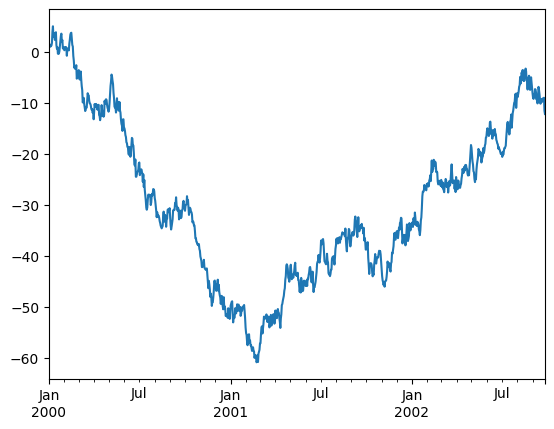

In [97]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();

If running under Jupyter Notebook, the plot will appear on plot(). Otherwise use matplotlib.pyplot.show to show it or matplotlib.pyplot.savefig to write it to a file.

In [98]:
plt.show();

On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

<Figure size 640x480 with 0 Axes>

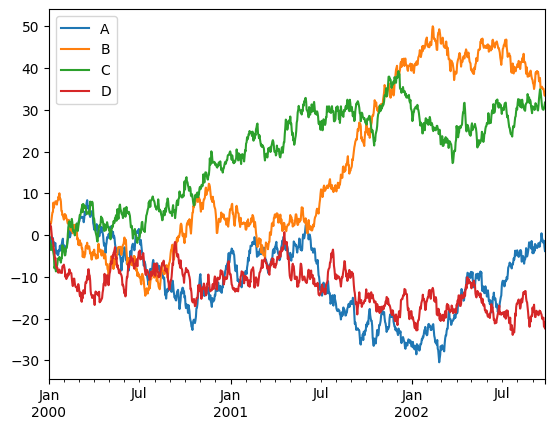

In [99]:
df = pd.DataFrame(

    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]

)

df = df.cumsum()

plt.figure();
df.plot();
plt.legend(loc='best');

In [103]:
from string import ascii_letters

<Axes: >

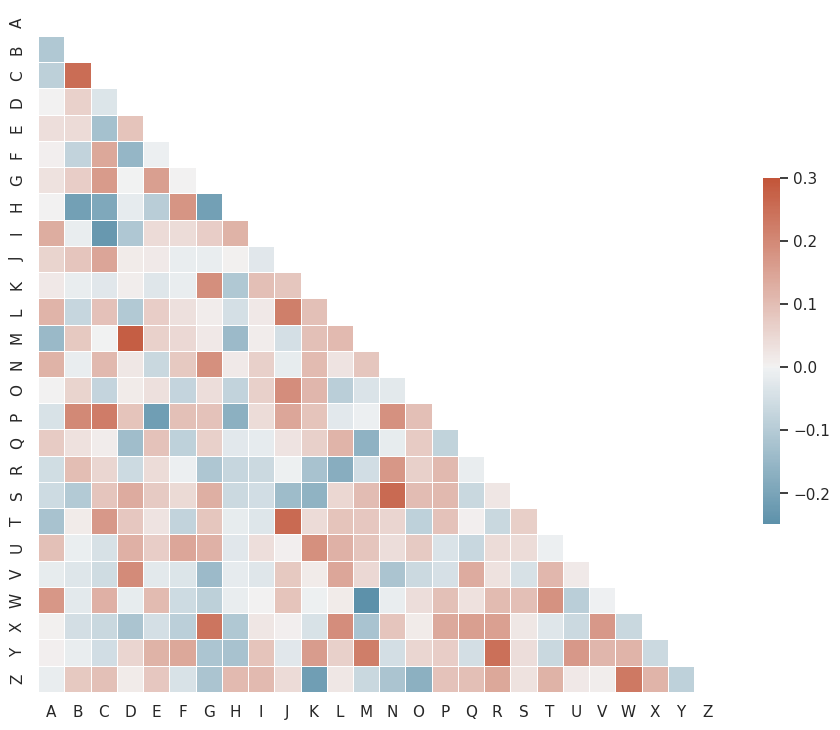

In [105]:
sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [106]:
d

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,-0.318854,-1.602981,-1.535218,-0.570401,-0.216728,0.254874,-0.149450,2.010783,-0.096784,0.422202,...,-0.951219,0.832973,-1.000208,0.343463,1.546030,0.690081,-2.045853,0.334467,-0.641459,-0.222497
1,-1.230374,0.205848,0.821371,-0.493780,-1.408794,-1.216324,1.734299,-0.206790,-0.733189,0.774163,...,-0.148826,-0.606270,-1.185801,0.455504,-0.837645,-0.146961,-0.682350,1.487670,-1.094711,-1.654707
2,-0.023842,-0.363738,-0.482943,0.739577,0.611252,0.491802,1.792924,-0.683737,1.054113,-0.615562,...,-1.120717,0.991136,1.630796,-1.900090,0.062316,0.479998,0.379609,-1.512245,0.289020,0.095524
3,-0.292821,0.856582,0.933473,-0.421045,1.590430,-1.063801,2.104884,-1.090494,1.484521,-1.089229,...,0.230258,0.195235,0.535839,0.684299,2.821279,0.916504,0.150722,0.017747,0.006885,0.329035
4,-0.587376,1.751572,0.308274,-0.894283,-0.769156,0.869197,0.371381,-0.628362,-0.922477,-0.903391,...,1.519031,0.749896,-2.269087,-0.760599,-0.955502,0.923951,0.315157,1.340910,0.678992,0.594258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.036298,-1.177101,-2.472118,-0.370044,0.108184,-0.753487,-0.331042,2.203373,-0.319100,0.428793,...,-0.087225,0.190644,-0.506678,-0.442679,-1.186259,0.743655,-1.842236,0.702369,-0.726212,-0.792110
96,-0.681074,2.203923,1.555724,-0.808559,-1.415792,0.586590,0.393986,0.455118,-0.050184,1.298277,...,-0.607768,0.051741,-1.183910,0.830444,0.911260,-1.470621,-0.450259,-1.146024,-0.548446,-0.016534
97,0.616011,0.162773,-0.425326,2.040243,0.339979,0.489751,1.030780,1.061831,-0.040148,-1.406366,...,-1.248445,-0.530126,-0.045328,1.314023,-0.203060,0.767502,2.055105,-0.131154,-1.185281,-0.208766
98,-1.268506,-0.815121,-1.670919,-1.103345,-1.348075,0.157345,0.249971,0.581991,0.115223,-0.898088,...,0.227623,-0.147131,0.692395,-1.308567,-1.197288,-1.348862,-1.612158,0.968366,-0.936233,-0.733935


In [110]:
def five(x): return 5
print(list(map(five, [1,2,3])))

[5, 5, 5]
